# **Samsung Innovation Campus (SIC 2024)**

**Nombre del Proyecto: Estudio de la Migración de la población dentro de Panamá debido a la Desigualdad Económica**

**Grupo: Data Wizards Gang**

**Conformado por:**
1. Justin Williams
2. Carlos Rodríguez Chong
3. José Luis Camarena
4. Oscar Pérez
5. Alejandro Cardona

## **Problema a resolver:**

En Panamá, la migración hacia la capital es grande debido a la marcada desigualdad económica que prevalece entre las provincias. Esta disparidad se atribuye a diversos factores, como las variaciones en el Producto Interno Bruto (PIB) por provincia, las tasas de desempleo, el nivel educativo y la diversidad de actividades económicas regionales. En este mini proyecto, nos centraremos en analizar estas variables para comprender el verdadero impacto que ejercen y para idear posibles soluciones a esta problemática. Para llevar a cabo nuestra investigación, hemos recopilado datos del Instituto Nacional de Estadística y Censo correspondientes a los años 2015 hasta el 2022.


_____

## Limpieza de datos

Hubieron algunos Excel que recopilamos y utilizaban "-" en vez de "0" por lo que podrían afectar nuestros cálculos al futuro por lo que lo ideal sería limpiar todos los datos antes de tener problemas.

### Cambio de Datos Null a Valor 0 Desempleo por nivel de preparación 2015-2022

In [71]:
import pandas as pd
from openpyxl import load_workbook

pd.reset_option('display.float_format')

# Ruta al archivo Excel
ruta_archivo = 'Datos/desempleados_por_nivel_de_preparacion_2015_2022.xlsx'

# Usar pd.ExcelFile para leer las hojas del archivo
excel_file = pd.ExcelFile(ruta_archivo)

# Crear un objeto ExcelWriter para escribir de vuelta al mismo archivo
with pd.ExcelWriter(ruta_archivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    for sheet_name in excel_file.sheet_names:
        # Leer cada hoja del archivo como un DataFrame
        df = excel_file.parse(sheet_name)
        
        # Reemplazar "-" por 0 en el DataFrame
        df.replace('-', 0, inplace=True)
        
        # DataFrame modificado de vuelta a la hoja correspondiente
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# Abrir el archivo Excel con openpyxl para guardar los cambios
wb = load_workbook(ruta_archivo)

# Guardar los cambios en el archivo Excel
wb.save(ruta_archivo)



In [72]:
df.head(10)

,region,total_desempleados,empleo_como_asalariado_a_tiempo_completo,empleo_como_asalariado_a_tiempo_parcial,empleo_independiente,cualquier_clase_de_empleo
0,Bocas del Toro,6255,1897,407,184,3767
1,Coclé,7665,3689,531,167,3278
2,Colón,14733,8764,526,103,5340
3,Chiriquí,12832,7149,499,126,5058
4,Darién,960,298,62,0,600
5,Herrera,2654,1304,258,0,1092
6,Los Santos,900,580,28,0,292
7,Panamá,103191,79450,3673,731,19337
8,Panamá Oeste,43244,23488,3224,1244,15288
9,Veraguas,5337,3656,381,0,1300


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   region                                    13 non-null     object
 1   total_desempleados                        13 non-null     int64 
 2   empleo_como_asalariado_a_tiempo_completo  13 non-null     int64 
 3   empleo_como_asalariado_a_tiempo_parcial   13 non-null     int64 
 4   empleo_independiente                      13 non-null     int64 
 5   cualquier_clase_de_empleo                 13 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 756.0+ bytes


_____

### Cambio de Datos Null a Valor 0 estudiantes aprobados y reprobados por 2015-2022


In [74]:
import pandas as pd
from openpyxl import load_workbook

# Ruta al archivo Excel
ruta_archivo = 'Datos/estudiantes_aprobados_reprobados_provincia_2015_2022.xlsx'

# Usar pd.ExcelFile para leer las hojas del archivo
excel_file = pd.ExcelFile(ruta_archivo)

# Crear un objeto ExcelWriter para escribir de vuelta al mismo archivo
with pd.ExcelWriter(ruta_archivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    for sheet_name in excel_file.sheet_names:
        # Leer cada hoja del archivo como un DataFrame
        df = excel_file.parse(sheet_name)
        
        # Reemplazar "-" por 0 en el DataFrame
        df.replace('-', 0, inplace=True)
        
        # Escribir el DataFrame modificado de vuelta a la hoja correspondiente
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        
# Abrir el archivo Excel con openpyxl para guardar los cambios
wb = load_workbook(ruta_archivo)

# Guardar los cambios en el archivo Excel
wb.save(ruta_archivo)

In [75]:
df.head(10)

,region,total_aprobados,aprobados_oficiales,aprobados_particulares,total_reprobados,reprobados_oficiales,reprobados_particulares
0,Bocas del Toro,14770,14130,640,907,905,2
1,Coclé,17347,16341,1006,1034,1031,3
2,Colón,22179,19443,2736,1128,1094,34
3,Chiriquí,33803,28544,5259,1715,1674,41
4,Darién,4090,4064,26,127,127,0
5,Herrera,7310,6752,558,522,519,3
6,Los Santos,5433,5031,402,257,257,0
7,Panamá,93642,62649,30993,6782,6561,221
8,Panamá Oeste,42064,34156,7908,1933,1898,35
9,Veraguas,19867,18700,1167,1097,1096,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   region                   13 non-null     object
 1   total_aprobados          13 non-null     int64 
 2   aprobados_oficiales      13 non-null     int64 
 3   aprobados_particulares   13 non-null     int64 
 4   total_reprobados         13 non-null     int64 
 5   reprobados_oficiales     13 non-null     int64 
 6   reprobados_particulares  13 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 860.0+ bytes


_____
_____

## Visualización de los datos obtenidos 

En esta sección vamos a ver algunos gráficos sobre cada uno de los excel que conseguimos para que se vea con el tipo de datos que estamos trabajando.


### 1- Estimación de Población por provincia de 2015-2022

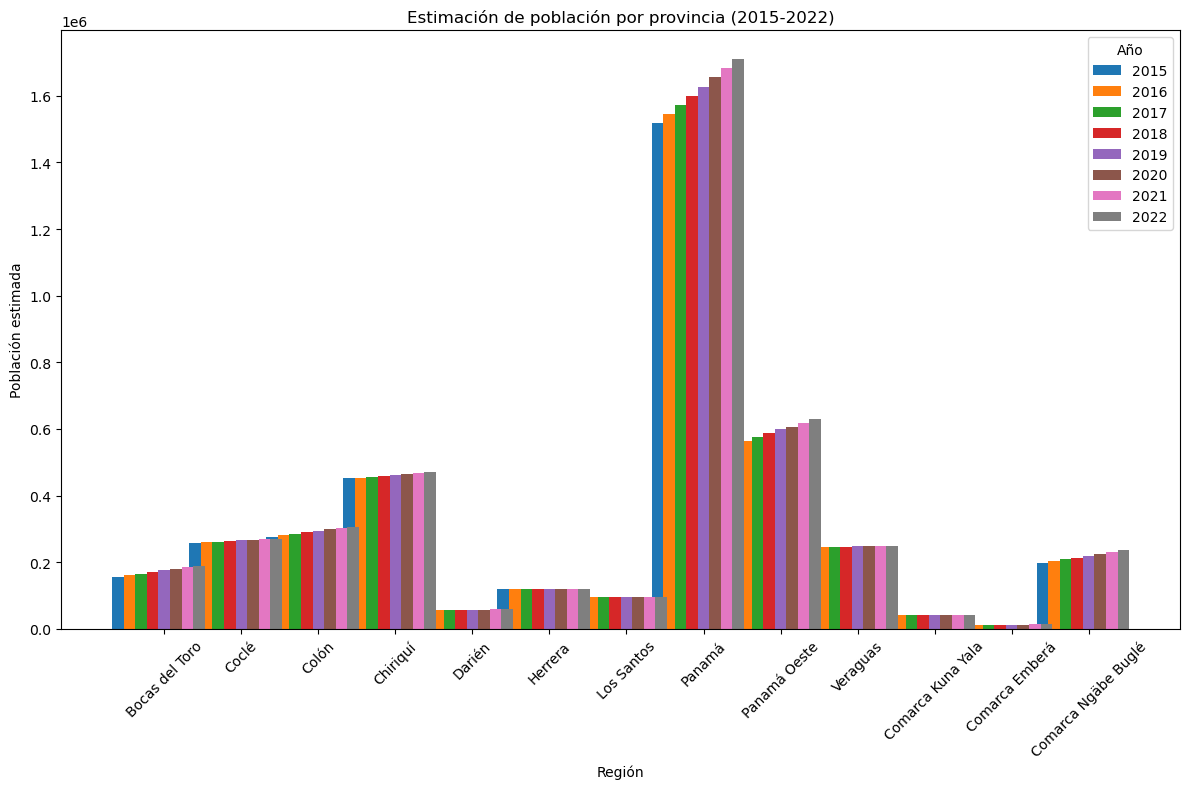

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
datos_poblacion = 'Datos/estimacion_poblacion_por_provincia_2015_2022.xlsx'
df_poblacion_estimada = pd.read_excel(datos_poblacion)

# Seleccionar las columnas de interés
valores = df_poblacion_estimada[["region", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Total de años para graficar
años = valores.columns[1:]  # Ignora la primera columna que es "region"

# Número de regiones para calcular el ancho de las barras
n_regiones = len(valores['region'])

# Ancho de las barras
ancho = 0.15

# Generar las barras para cada año
for i, año in enumerate(años):
    # Calcular el desplazamiento para cada año. Se centran las barras alrededor de 0, 1, 2, ..., n_regiones
    desplazamiento = [x + (i - len(años) / 2) * ancho for x in range(n_regiones)]
    plt.bar(desplazamiento, valores[año], width=ancho, label=año)

# Añadir título y etiquetas
plt.title('Estimación de población por provincia (2015-2022)')
plt.xlabel('Región')
plt.ylabel('Población estimada')

# Ajustar las etiquetas del eje X para que muestren los nombres de las regiones
plt.xticks(range(n_regiones), valores['region'], rotation=45)

# Añadir la leyenda
plt.legend(title='Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [78]:
df_poblacion_estimada.head(10)

# Los números que tengan e+ es por la notación científica de pandas

,region,2015,2016,2017,2018,2019,2020,2021,2022
0,Bocas del Toro,156478,160994,165622,170320,175121,179990,1.845514e+05,1.892554e+05
1,Coclé,256970,259322,261309,263254,265149,266969,2.688390e+05,2.706965e+05
2,Colón,276746,281094,285429,289764,294060,298344,3.026951e+05,3.070158e+05
3,Chiriquí,451236,454083,456821,459507,462056,464538,4.673517e+05,4.700121e+05
4,Darién,54366,55055,55753,56447,57143,57818,5.851880e+04,5.921074e+04
5,Herrera,118090,118334,118551,118736,118865,118982,1.192168e+05,1.193950e+05
6,Los Santos,95150,95291,95401,95485,95540,95557,9.569060e+04,9.577249e+04
7,Panamá,1516790,1544185,1571810,1599250,1626374,1656339,1.682967e+06,1.710731e+06
8,Panamá Oeste,552982,564901,576322,587497,598514,606458,6.190517e+05,6.298916e+05
9,Veraguas,244415,245284,246121,246899,247644,248325,2.491888e+05,2.499719e+05


In [79]:
df_poblacion_estimada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  13 non-null     object 
 1   2015    13 non-null     int64  
 2   2016    13 non-null     int64  
 3   2017    13 non-null     int64  
 4   2018    13 non-null     int64  
 5   2019    13 non-null     int64  
 6   2020    13 non-null     int64  
 7   2021    13 non-null     float64
 8   2022    13 non-null     float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ KB


_____

### 2- Desempleados por su nivel de preparación 2015-2022

In [80]:
import pandas as pd
import plotly.express as px

# Leer el archivo Excel
archivo_excel = 'Datos/desempleados_por_nivel_de_preparacion_2015_2022.xlsx'
datos = pd.read_excel(archivo_excel, sheet_name=None)

# Inicializar diccionario para almacenar el total de desempleados por año
total_desempleados_por_año = {}

# Recorrer cada hoja del archivo Excel
for año, df in datos.items():
    # Sumar el total de desempleados para cada año
    total_desempleados_por_año[año] = df['total_desempleados'].sum()

# Convertir diccionario a DataFrame
df_total_desempleados = pd.DataFrame(total_desempleados_por_año.items(), columns=['Año', 'Total_Desempleados'])

# Asegúrate de que los datos estén en el formato correcto para graficar
df_total_desempleados['Año'] = pd.to_numeric(df_total_desempleados['Año'])
df_total_desempleados.sort_values('Año', inplace=True)

# Graficar con plotly.express
fig = px.line(df_total_desempleados, x='Año', y='Total_Desempleados', title='Total de Desempleados por Año')
fig.update_xaxes(title='Año')
fig.update_yaxes(title='Total de Desempleados')
fig.show()


In [81]:
df_total_desempleados.head(10)

,Año,Total_Desempleados
0,2015,90070.000000
1,2016,101358.000000
2,2017,109265.000000
3,2018,117456.000000
4,2019,144197.000000
5,2020,123639.333333
6,2021,117456.000000
7,2022,198948.000000


In [82]:
df_total_desempleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 8 non-null      int64  
 1   Total_Desempleados  8 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 260.0 bytes


In [83]:
import pandas as pd
import plotly.express as px

# Cargar los datos
datos_desempleo = pd.read_excel('Datos/desempleados_por_nivel_de_preparacion_2015_2022.xlsx')

# Seleccionar solo las columnas relevantes
df_desempleados_tipo_empleo = datos_desempleo[['empleo_como_asalariado_a_tiempo_completo', 
         'empleo_como_asalariado_a_tiempo_parcial',
         'empleo_independiente',
         'cualquier_clase_de_empleo']]

# Sumar la cantidad de desempleados por cada tipo de empleo a lo largo de los años
df_totales_por_categoria = df_desempleados_tipo_empleo.sum()

# Crear un pie chart con Plotly Express
fig = px.pie(values=df_totales_por_categoria, 
             names=df_totales_por_categoria.index,
             title='Cantidad de desempleados por tipo de empleo al que están capacitados (2015-2022)')

# Mostrar el pie chart
fig.show()

_____

### 3- Media de Salario por Provincia de 2015-2022

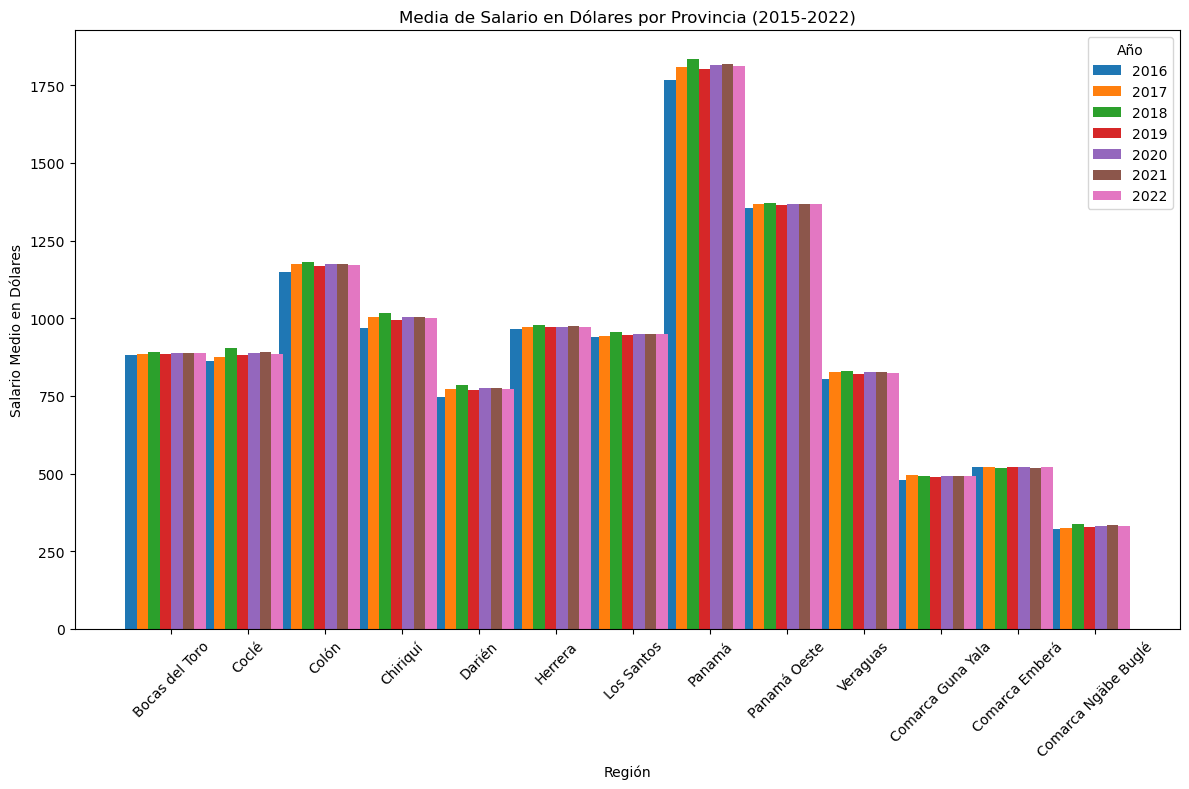

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
workbook1 = 'Datos/media_de_salario_dolares_por_provincia_2015_2022.xlsx'
df = pd.read_excel(workbook1)

# Preparar los datos (si 'valores' no es necesario y df ya tiene la estructura correcta, se puede omitir este paso)
valores = df.drop(columns='region')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Total de años para graficar
años = valores.columns[1:]  # Tomar todas las columnas excepto la primera (que es 'region')

# Ancho de las barras
ancho = 0.15

# Número de regiones para calcular el ancho de las barras
n_regiones = len(valores)

# Generar las barras para cada año utilizando los índices correctos
for i, año in enumerate(años):
    desplazamiento = [x + (i - len(años) / 2) * ancho for x in range(n_regiones)]
    plt.bar(desplazamiento, valores.iloc[:, i + 1], width=ancho, label=str(año)) 
    
# Añadir título y etiquetas
plt.title('Media de Salario en Dólares por Provincia (2015-2022)')
plt.xlabel('Región')
plt.ylabel('Salario Medio en Dólares')

# Ajustar las etiquetas del eje X para mostrar los nombres de las regiones
plt.xticks(range(n_regiones), df['region'], rotation=45)  # Esto asume que 'region' es la primera columna

# Añadir la leyenda
plt.legend(title='Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



_____

### 4- Valor económico por provincia

In [87]:
#Promedio del valor económico por Provincia
import pandas as pd
import plotly.express as px

# Cargar el archivo Excel en un DataFrame de pandas
datos_economicos = pd.read_excel('Datos/valor_economico_por_provincia_2015_2022.xlsx').round(2)

# Obtener las columnas numéricas para calcular el promedio
columnas_numericas = datos_economicos.select_dtypes(include=['float64', 'int64']).columns

# Calcular la suma por provincia
df_millones_provincia_suma = datos_economicos[columnas_numericas].sum(axis=1)
df_millones_provincia_suma = pd.DataFrame(df_millones_provincia_suma, columns=['Millones']).round(2)

# Agregar la columna de provincias
df_millones_provincia_suma['Provincia'] = datos_economicos['region']

# Graficar los datos utilizando plotly.express
fig = px.bar(df_millones_provincia_suma, x='Provincia', y='Millones', title='Millones de dólares aportados al país (2015 - 2022)')
fig.update_layout(xaxis_title='Provincia', yaxis_title='Millones en dólares')
fig.show()


In [88]:
#Millones por provincia por año
datos_economicos

,region,2015,2016,2017,2018,2019,2020,2021,2022
0,Bocas del Toro,481.14,500.43,526.37,567.98,582.26,637.26,551.05,590.2
1,Coclé,941.25,931.74,961.61,1012.47,1068.99,925.30,1011.68,1002.0
2,Colón,4371.92,5605.69,6919.18,7422.15,7624.13,5979.40,7215.40,6939.6
3,Chiriquí,2073.87,2168.85,2250.64,2357.41,2431.57,2231.54,2301.21,2321.4
4,Darién,95.39,100.75,106.23,107.05,116.37,113.04,110.13,113.2
5,Herrera,492.89,511.54,536.42,558.11,577.21,531.52,546.26,551.7
6,Los Santos,362.35,375.66,400.14,416.45,430.49,385.99,407.41,408.0
7,Panamá,24443.00,24848.62,25506.94,26272.41,26855.67,21088.02,25415.93,24453.2
8,Panamá Oeste,2532.93,2545.15,2499.87,2451.00,2670.28,2282.57,2527.12,2493.3
9,Veraguas,765.45,794.81,826.25,858.66,915.83,839.84,866.73,874.1


In [89]:
# Porcentaje de contribución anual al PIB por Provincia
import pandas as pd
import plotly.express as px

# Cargar el archivo Excel en un DataFrame de pandas
datos_contribucion = pd.read_excel('Datos/valor_economico_por_provincia_2015_2022.xlsx', sheet_name='contribucion_anual_al_pais').round(1)

# Seleccionar las columnas relevantes para el análisis
columnas_porcentaje = datos_contribucion.columns[1:]  # Excluir la columna de 'region'

# Calcular la suma de contribución anual al PIB por provincia
suma_porcentaje = datos_contribucion[columnas_porcentaje].sum(axis=1).round(1)

# Crear un DataFrame con la suma de porcentaje por provincia
df_porcentaje_provincia_suma = pd.DataFrame({'Provincia': datos_contribucion['region'], 'Porcentaje': suma_porcentaje})

# Graficar los datos utilizando plotly.express en un pie chart
fig = px.pie(df_porcentaje_provincia_suma, names='Provincia', values='Porcentaje', title='Promedio de contribución anual al PIB del país por provincia (2015 - 2022)')
fig.update_traces(textposition='inside', textinfo='percent+label')  # Añadir etiquetas con porcentajes dentro del pie chart
fig.show()


In [90]:
#datos originales del PIB

datos_contribucion.head(10)

,region,2015,2016,2017,2018,2019,2020,2021,2022
0,Bocas del Toro,1.3,1.3,1.3,1.4,1.4,1.8,1.4,1.5
1,Coclé,2.6,2.4,2.4,2.4,2.5,2.6,2.5,2.5
2,Colón,12.0,14.7,17.2,17.8,17.7,16.9,17.7,17.4
3,Chiriquí,5.7,5.7,5.6,5.6,5.6,6.3,5.6,5.8
4,Darién,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
5,Herrera,1.4,1.3,1.3,1.3,1.3,1.5,1.3,1.4
6,Los Santos,1.0,1.0,1.0,1.0,1.0,1.1,1.0,1.0
7,Panamá,67.2,65.1,63.3,62.9,62.4,59.7,62.4,61.5
8,Panamá Oeste,7.0,6.7,6.2,5.9,6.2,6.5,6.2,6.3
9,Veraguas,2.1,2.1,2.0,2.1,2.1,2.4,2.1,2.2


_____

### 5- Trabajadores de la nación por su nivel de educación

In [91]:
import pandas as pd
import plotly.express as px

# Leer el archivo Excel
archivo_excel = 'Datos/trabajadores_por_educacion_por_provincia_2015_2022.xlsx'
datos = pd.read_excel(archivo_excel, sheet_name=None)

# Inicializar diccionario para almacenar el total de trabajadores y trabajadores universitarios por año
total_trabajadores_por_año = {}
trabajadores_universitarios_por_año = {}

# Recorrer cada hoja del archivo Excel
for año, df in datos.items():
    # Sumar el total de trabajadores y trabajadores universitarios para cada año
    total_trabajadores_por_año[año] = df['total_trabajadores'].sum()
    trabajadores_universitarios_por_año[año] = df['trabajadores_universitarios'].sum()

# Convertir diccionarios a DataFrames
df_total_trabajadores = pd.DataFrame(total_trabajadores_por_año.items(), columns=['Año', 'Total_Trabajadores'])
df_trabajadores_universitarios = pd.DataFrame(trabajadores_universitarios_por_año.items(), columns=['Año', 'Trabajadores_Universitarios'])

# Unir los DataFrames
df_porcentaje = pd.merge(df_total_trabajadores, df_trabajadores_universitarios, on='Año')

# Calcular el porcentaje de trabajadores universitarios respecto al total de trabajadores
df_porcentaje['Porcentaje_Trabajadores_Universitarios'] = (df_porcentaje['Trabajadores_Universitarios'] / df_porcentaje['Total_Trabajadores']) * 100

# Graficar con plotly.express
fig = px.line(df_porcentaje, x='Año', y='Porcentaje_Trabajadores_Universitarios', title='Porcentaje de Trabajadores Universitarios vs Total de Trabajadores por Año')
fig.update_xaxes(title='Año')
fig.update_yaxes(title='Porcentaje de Trabajadores Universitarios')
fig.show()


### 6- Estudiantes Matriculados por provincia

In [92]:
import pandas as pd
import plotly.express as px

# Cargar el archivo Excel en un DataFrame de pandas
datos_matricula = pd.read_excel('Datos/matricula_premedia_media_2015_2022.xlsx')

# Calcular la suma por región
df_total_por_region = datos_matricula.groupby('region')['total'].sum().reset_index()

# Graficar los datos utilizando plotly.express
fig = px.bar(df_total_por_region, x='total', y='region', 
             title='Total de Matrículas por Región (2015-2022)',
             labels={'region': 'Región', 'total': 'Total de Matrículas'})
fig.update_layout(xaxis_title='Total Matrículas', yaxis_title='Región')
fig.show()



____

### 7- Estudiantes Aprobados y Reprobados

In [93]:
import pandas as pd
import plotly.express as px

# Lee el archivo Excel
file_path = 'Datos/estudiantes_aprobados_reprobados_provincia_2015_2022.xlsx'
xls = pd.ExcelFile(file_path)

# Inicializa un diccionario vacío para almacenar los dataframes de cada hoja
dataframes = {}

# Itera sobre cada hoja en el archivo Excel
for sheet_name in xls.sheet_names:
    # Lee la hoja en un dataframe
    df = pd.read_excel(xls, sheet_name)
    # Almacena el dataframe en el diccionario
    dataframes[sheet_name] = df

# Inicializar un diccionario para almacenar los totales de estudiantes (aprobados y reprobados) por provincia
totales_por_provincia = {}

# Iterar sobre cada hoja del Excel
for sheet_name, df in dataframes.items():
    # Calcular el total de estudiantes (aprobados y reprobados) por provincia
    for index, fila in df.iterrows():
        provincia = fila['region']
        total_estudiantes = fila['total_aprobados'] + fila['total_reprobados']
        if provincia in totales_por_provincia:
            totales_por_provincia[provincia] += total_estudiantes
        else:
            totales_por_provincia[provincia] = total_estudiantes

# Convertir el diccionario a un DataFrame
totales_df = pd.DataFrame(list(totales_por_provincia.items()), columns=['Provincia', 'Total Estudiantes'])

# Graficar el total de estudiantes por provincia utilizando Plotly Express
fig = px.bar(totales_df, x='Provincia', y='Total Estudiantes', title='Total de Estudiantes (Aprobados y Reprobados) por Provincia del 2015 - 2022')
fig.show()

In [94]:
import pandas as pd
import plotly.express as px

# Cargar los datos desde el archivo Excel
archivo_excel = 'Datos/estudiantes_aprobados_reprobados_provincia_2015_2022.xlsx'
datos_por_provincia = pd.read_excel(archivo_excel, sheet_name=None)

# Inicializar un diccionario para almacenar los totales de estudiantes reprobados por provincia
totales_por_provincia = {}

# Iterar sobre cada hoja del Excel (cada año)
for año, datos in datos_por_provincia.items():
    # Calcular el total de estudiantes reprobados por provincia para este año
    for index, fila in datos.iterrows():
        provincia = fila['region']
        reprobados = fila['total_reprobados']
        if provincia in totales_por_provincia:
            totales_por_provincia[provincia] += reprobados
        else:
            totales_por_provincia[provincia] = reprobados

# Convertir el diccionario a un DataFrame
totales_df = pd.DataFrame(list(totales_por_provincia.items()), columns=['Provincia', 'Total Reprobados'])

# Graficar el total de estudiantes reprobados por provincia
fig = px.bar(totales_df, x='Provincia', y='Total Reprobados', title='Total de Estudiantes Reprobados por Provincia del 2015 al 2022')
fig.show()

In [41]:
import pandas as pd
import plotly.express as px

# Leer el archivo Excel
file_path = 'Datos/estudiantes_aprobados_reprobados_provincia_2015_2022.xlsx'
xls = pd.ExcelFile(file_path)

# Inicializar un diccionario vacío para almacenar los dataframes de cada hoja
dataframes = {}

# Iterar sobre cada hoja en el archivo Excel
for sheet_name in xls.sheet_names:
    # Leer la hoja en un dataframe
    df = pd.read_excel(xls, sheet_name)
    # Almacenar el dataframe en el diccionario
    dataframes[sheet_name] = df

# Inicializar un diccionario para almacenar los totales de estudiantes y reprobados por provincia
totales_por_provincia = {'Provincia': [], 'Total Estudiantes': [], 'Total Reprobados': []}

# Iterar sobre cada hoja del Excel
for sheet_name, df in dataframes.items():
    # Calcular el total de estudiantes y reprobados por provincia
    for index, fila in df.iterrows():
        provincia = fila['region']
        total_estudiantes = fila['total_aprobados'] + fila['total_reprobados']
        total_reprobados = fila['total_reprobados']
        if provincia not in totales_por_provincia['Provincia']:
            totales_por_provincia['Provincia'].append(provincia)
            totales_por_provincia['Total Estudiantes'].append(total_estudiantes)
            totales_por_provincia['Total Reprobados'].append(total_reprobados)
        else:
            idx = totales_por_provincia['Provincia'].index(provincia)
            totales_por_provincia['Total Estudiantes'][idx] += total_estudiantes
            totales_por_provincia['Total Reprobados'][idx] += total_reprobados

# Convertir el diccionario a un DataFrame
totales_df = pd.DataFrame(totales_por_provincia)

# Graficar la relación entre el total de estudiantes y el total de estudiantes reprobados por provincia
fig = px.scatter(totales_df, x='Total Estudiantes', y='Total Reprobados',
                 title='Relación entre Total de Estudiantes y Total de Reprobados por Provincia 2015-2022',
                 hover_name='Provincia')  # Agregar el nombre de la provincia al hover
fig.update_layout(xaxis_title='Total de Estudiantes', yaxis_title='Total de Reprobados')
fig.show()


_____
_____

## Preguntas de análisis

Tras una evaluación individual de los datos, han surgido diversas interrogantes que abordaremos mediante la utilización de varios gráficos de correlación.

Cabe recordar que un gráfico de correlación constituye una herramienta gráfica idónea para evidenciar la relación entre dos conjuntos de datos y para cuantificar la intensidad de dicha relación.

Para llevar a cabo un análisis adecuado de los valores, tomaremos en consideración lo siguiente:

Un valor menor que 0 indica la existencia de una correlación negativa, lo que sugiere una asociación inversa entre las variables. A medida que este valor se aproxima a -1, se intensifica la fuerza de dicha relación inversa, lo que implica que un aumento significativo en una variable se correlaciona con una disminución considerable en la otra. Cuando el valor alcanza exactamente -1, denota una correlación negativa perfecta.

Un valor mayor que 0 indica la presencia de una correlación positiva, lo que sugiere una asociación directa entre las variables. Cuanto más se acerca este valor a +1, mayor es la intensidad de dicha asociación. Un valor de +1 indica una correlación positiva perfecta, caracterizada por una relación lineal directa.

Para la interpretación de nuestras conclusiones, nos basaremos en los siguientes parámetros de la correlación de Pearson:

- Entre 0 y 0,10: correlación inexistente.
- Entre 0,10 y 0,29: correlación débil.
- Entre 0,30 y 0,50: correlación moderada.
- Entre 0,50 y 1,00: correlación fuerte

### Correlación entre desempleo y nivel de educación:

Explorar si existe una correlación entre la tasa de desempleo y el nivel de educación de los trabajadores en cada provincia. ¿Las provincias con una mayor proporción de trabajadores sin educación tienen tasas de desempleo más altas?

In [83]:
import pandas as pd
import plotly.express as px

# Cargar los datos
trabajadores_educacion = pd.read_excel('Datos/trabajadores_por_educacion_por_provincia_2015_2022.xlsx')
desempleo = pd.read_excel('Datos/desempleados_por_nivel_de_preparacion_2015_2022.xlsx')

# Seleccionar los datos relevantes para el análisis
trabajadores_sin_educacion = trabajadores_educacion[['region', 'trabajadores_sin_educacion']]
desempleo_total = desempleo[['region', 'total_desempleados']]

# Combinar los datos de desempleo y trabajadores sin educación por provincia
datos_combinados = pd.merge(trabajadores_sin_educacion, desempleo_total, on='region')

# Calcular la correlación entre trabajadores sin educación y desempleo
correlacion = datos_combinados['trabajadores_sin_educacion'].corr(datos_combinados['total_desempleados']).round(5)

# Crear un gráfico de dispersión interactivo con Plotly Express
fig = px.scatter(datos_combinados, 
                 x='trabajadores_sin_educacion', 
                 y='total_desempleados', 
                 title='Correlación entre desempleo y trabajadores sin educación',
                 labels={'trabajadores_sin_educacion': 'Trabajadores sin educación', 
                         'total_desempleados': 'Total desempleados'},
                 trendline='ols',  # Agregar línea de regresión
                 hover_name='region'  # Mostrar el nombre de la región al pasar el cursor sobre cada punto
                 )

# Mostrar el gráfico
fig.show()

print(f"Correlación entre desempleo y trabajadores sin educación: {correlacion}")

Correlación entre desempleo y trabajadores sin educación: 0.55344


**Conclusión:**


Basándonos en la correlación calculada entre el desempleo y el nivel de educación, que es de 0.55344, podemos inferir lo siguiente:

- La correlación positiva moderada sugiere que hay una asociación directa entre el desempleo y el porcentaje de trabajadores sin educación en cada provincia.

- Las provincias con una mayor proporción de trabajadores sin educación tienden a tener tasas de desempleo más altas.

- Este resultado resalta la importancia de la educación en el mercado laboral. Un mayor nivel educativo podría correlacionarse con tasas de desempleo más bajas, lo que subraya la necesidad de políticas que fomenten la educación y la capacitación laboral para reducir el desempleo.

- Sin embargo, es importante considerar otros factores que podrían influir en las tasas de desempleo, como la situación económica general, la disponibilidad de empleos, y las políticas de empleo locales. Estos factores también deben tenerse en cuenta al analizar la relación entre el desempleo y la educación.

____

### Correlación entre salario medio y nivel de educación:

Investigar si hay una correlación positiva entre el salario medio y el nivel de educación. ¿Las provincias con una mayor proporción de trabajadores universitarios tienden a tener salarios más altos?


In [86]:
import pandas as pd
import plotly.express as px

# Cargar los datos
salario_medio = pd.read_excel('Datos/media_de_salario_dolares_por_provincia_2015_2022.xlsx')
trabajadores_educacion = pd.read_excel('Datos/trabajadores_por_educacion_por_provincia_2015_2022.xlsx')

# Calcular el salario medio promedio por provincia y redondear a 2 decimales
salario_medio_promedio = salario_medio.drop(columns=['region']).mean(axis=1, skipna=True).round(2)
salario_medio['salario_medio_promedio'] = salario_medio_promedio

# Seleccionar los datos relevantes para el análisis
datos_combinados = pd.merge(salario_medio[['region', 'salario_medio_promedio']], 
                            trabajadores_educacion[['region', 'trabajadores_universitarios']], 
                            on='region')

# Crear gráfico interactivo con Plotly Express
fig = px.scatter(datos_combinados, 
                 x='trabajadores_universitarios', 
                 y='salario_medio_promedio', 
                 title='Correlación entre salario medio y proporción de trabajadores universitarios',
                 labels={'trabajadores_universitarios': 'Proporción de trabajadores universitarios', 
                         'salario_medio_promedio': 'Salario medio promedio'},
                 trendline='ols',  # Agregar línea de regresión
                 hover_name='region',  # Mostrar el nombre de la región al pasar el cursor sobre cada punto
                 color_discrete_sequence=['red']  # Color rojo para todos los puntos
                 )

# Mostrar el gráfico
fig.show()

# Calcular correlación
correlacion = datos_combinados['salario_medio_promedio'].corr(datos_combinados['trabajadores_universitarios']).round(5)
print(f"Correlación entre salario medio y proporción de trabajadores universitarios: {correlacion}")

Correlación entre salario medio y proporción de trabajadores universitarios: 0.84185


**Conclusión:**
    
Dada la correlación entre el salario medio y la proporción de trabajadores universitarios, que es de 0.84185, la interpretación sería la siguiente:

- La correlación positiva fuerte sugiere una relación directa entre el salario medio y la proporción de trabajadores universitarios en cada provincia.

- Las provincias con una mayor proporción de trabajadores universitarios tienden a tener salarios más altos.

- Este hallazgo resalta la importancia de la educación universitaria en el mercado laboral. Un mayor nivel de educación, representado por la proporción de trabajadores con educación universitaria, se correlaciona significativamente con salarios más altos.

- Sin embargo, es necesario considerar otros factores que podrían influir en los salarios medios, como el costo de vida, la demanda de habilidades específicas en la región y las políticas salariales de las empresas.

- A pesar de estas consideraciones adicionales, la fuerte correlación entre el salario medio y la proporción de trabajadores universitarios indica que la inversión en educación universitaria podría conducir a mejores perspectivas salariales en el mercado laboral.

____

### Correlación entre nivel de educación de los trabajadores y contribución al PIB:

Investigar si existe una correlación entre el nivel educativo de los trabajadores (por ejemplo, trabajadores universitarios) y la contribución al PIB por provincia. ¿Las provincias con una mayor proporción de trabajadores universitarios contribuyen más al PIB?


In [96]:
import pandas as pd
import plotly.express as px
import numpy as np

# Cargar los datos de trabajadores por educación y contribución anual al PIB
trabajadores_educacion = pd.read_excel('Datos/trabajadores_por_educacion_por_provincia_2015_2022.xlsx')
contribucion_pib = pd.read_excel('Datos/valor_economico_por_provincia_2015_2022.xlsx', sheet_name='contribucion_anual_al_pais').round(1)


nombre_columna_provincias = 'region' 
contribucion_pib = contribucion_pib.rename(columns={'Nombre_de_la_columna_correcta': 'region'})

# Seleccionar los datos relevantes para el análisis
trabajadores_universitarios = trabajadores_educacion[['region', 'trabajadores_universitarios']]

# Combinar los datos de trabajadores universitarios y contribución al PIB por año
datos_combinados = pd.merge(trabajadores_universitarios, contribucion_pib, on='region')

# Graficar los datos utilizando Plotly Express
fig = px.scatter(datos_combinados, 
                 x='trabajadores_universitarios', 
                 y=datos_combinados.columns[1:],  # Las columnas restantes son los años de contribución al PIB
                 title='Contribución al PIB vs Trabajadores Universitarios',
                 labels={'trabajadores_universitarios': 'Trabajadores Universitarios', 'value': 'Contribución al PIB', 'variable': 'Año'},
                 hover_name='region'  # Mostrar el nombre de la región al pasar el cursor sobre cada punto
                 )

# Calcular la correlación entre trabajadores universitarios y contribución al PIB
correlacion = datos_combinados['trabajadores_universitarios'].corr(datos_combinados.iloc[:, 1:])

# Mostrar el gráfico
fig.show()

# Imprimir la correlación
print(f"Correlación entre trabajadores universitarios y contribución al PIB: {correlacion}")



Correlación entre trabajadores universitarios y contribución al PIB: -0.169001378162714


**Conclusión**

Dado que la correlación entre la proporción de trabajadores universitarios y la contribución al PIB es de -0.169001378162714, podemos realizar las siguientes observaciones:

- La correlación negativa débil sugiere una asociación inversa entre la proporción de trabajadores universitarios y la contribución al PIB por provincia.

- Contrariamente a la hipótesis inicial, las provincias con una mayor proporción de trabajadores universitarios no necesariamente contribuyen más al PIB. Esta relación puede ser el resultado de varios factores, como la estructura económica regional, la presencia de industrias específicas y las políticas económicas locales.

- Es importante destacar que la correlación débil también indica que la proporción de trabajadores universitarios no es un predictor significativo de la contribución al PIB en las provincias. Otros factores económicos y estructurales pueden tener un impacto más significativo en la generación de riqueza.

- Además, en algunas regiones, como las comarcas, la contribución al PIB puede ser limitada, lo que significa que incluso si la proporción de trabajadores universitarios es alta, su impacto en la contribución total al PIB podría ser mínimo.

- Por lo tanto, es necesario considerar una gama más amplia de variables económicas y estructurales para comprender completamente las dinámicas de contribución al PIB en las diferentes provincias.


___
___

## **Soluciones viables:**

En base a los datos analizados se llegó a la conclusión que no solo la preparación de los profesionales influye sino también las actividades económicas que poseen las provincias.

- Diversificación Económica: 

Reconociendo que las actividades económicas de las provincias también influyen en la contribución al PIB y en los salarios, una solución viable sería fomentar la diversificación económica en áreas con alta población y potencial humano. Esto implicaría trasladar empresas existentes o abrir nuevas en estas zonas, aprovechando el capital humano local y generando oportunidades de empleo que contribuyan a igualar los salarios a nivel nacional.

- Desarrollo de Infraestructura y Servicios: 

Mejorar la infraestructura y los servicios básicos en las regiones menos desarrolladas puede hacerlas más atractivas para las empresas y los trabajadores. Esto podría incluir mejoras en transporte, comunicaciones, educación y salud, lo que ayudaría a crear un entorno propicio para el crecimiento económico y la retención de talento local.

- Inversión en Educación y Capacitación:

Continuar invirtiendo en educación y capacitación laboral en todas las regiones del país es fundamental. Esto no solo aumentará la preparación de la fuerza laboral, sino que también abrirá oportunidades para trabajos mejor remunerados y contribuirá a reducir la brecha salarial.

___
___

## Preguntas interesantes a responder:

**¿Qué estrategias de comunicación y sensibilización se implementarán para generar conciencia sobre la importancia de abordar la desigualdad y obtener el respaldo público necesario?**

Se podrían implementar estrategias de comunicación y sensibilización que incluyan campañas de información, eventos públicos, medios de comunicación y redes sociales para destacar la importancia de abordar la desigualdad salarial y promover el respaldo público a través de la educación y la concientización sobre el impacto negativo de la desigualdad en la sociedad.

**¿Cómo se asegurará la participación y el apoyo de diversos actores, incluidos el gobierno, la sociedad civil, el sector privado y la comunidad académica?**

La participación y el apoyo de diversos actores se asegurarán mediante la creación de alianzas estratégicas. Se establecerán espacios de diálogo y colaboración donde todos los sectores puedan contribuir con ideas y recursos para abordar la desigualdad salarial de manera integral ya que si bien queremos deshacernos de la desigualdad tambíen es importante mantener las empresas a flote para mantener y mejorar nuestra economía.



___
___

## **Propuesta de Valor:**

Es beneficioso poder expandir el análisis más allá de los datos obtenidos del INEC, considerando variables adicionales como la etnia y el sexo. Estos datos podrían proporcionar una comprensión más completa de las disparidades salariales y ayudarían a identificar mejor las áreas de desigualdad. Continuar con el estudio permitiría seguir abordando la desigualdad económica y evitar la migración hacia las regiones más desarrolladas del país, promoviendo un desarrollo más equitativo en todas las provincias.

____